<i>O foco deste notebook é, unicamente, a demonstração do cálculo fundamental em uma regressão linear. A criação de um modelo robusto envolve um processo consideravelmente mais complexo e multifacetado.</i>

<h3>O que é uma regressão linear?</h3>
A regressão linear é uma técnica estatistica usada para tentar prever o valor de uma variavel dependente com base no comportamente de uma ou mais variaveis independendes. O objetivo é emcontrar os melhores coeficientes de uma equação linear que consiga ficar mais proximo de todos os pontos de dados.

<p>Podemos representar a <b>equação da reta</b> como:

$$ y = b_1x + b_0 $$

onde:

- $y$ representa o valor da coordenada vertical.
- $x$ representa o valor da coordenada horizontal.
- $b_1$ é o coeficiente angular (ou inclinação) da reta.
- $b_0$ é o coeficinete liner (ou intercpto). Representa o valor de $y$ quando $x$ é igual a zero.

Vamos ver isso na prática!

In [25]:
# importação das bibliotecas que vou usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv(r"C:\Users\Robson\Downloads\OECD,DF_BLI,+all (1).csv")
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,...,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,...,2.3,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
1,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,...,2.4,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
2,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,...,3.8,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
3,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CZE,Czechia,JE_LMIS,Labour market insecurity,L,Value,...,2.3,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
4,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,...,4.5,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN


In [27]:
df = df[['Country', 'Indicator', 'OBS_VALUE']]
df.sort_values(by='Country')

,Country,Indicator,OBS_VALUE
451,Australia,Quality of support network,93.0
1372,Australia,Student skills,495.0
1335,Australia,Student skills,499.0
2110,Australia,Life expectancy,85.0
223,Australia,Employment rate,73.0
...,...,...,...
1586,United States,Life satisfaction,7.0
826,United States,Water quality,90.0
174,United States,Feeling safe walking alone at night,88.0
1663,United States,Life satisfaction,7.5


In [28]:
pivot_df = pd.pivot_table(data= df, index='Country', columns='Indicator', values='OBS_VALUE', aggfunc='first')
pivot_df = pivot_df.reset_index()
pivot_df.dropna(inplace=True)

pivot_df.head()

Indicator,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
1,Austria,12.2,0.8,86.0,5.3,72.0,86.0,0.5,37001.0,309637.0,...,53132.0,92.0,1.6,71.0,1.3,491.0,14.51,76.0,92.0,17.0
2,Belgium,12.8,0.7,80.0,4.3,65.0,56.0,1.1,34884.0,447607.0,...,54327.0,90.0,2.1,74.0,2.0,500.0,15.52,88.0,79.0,19.0
4,Canada,7.1,0.2,92.0,3.3,70.0,78.0,1.2,34421.0,478240.0,...,55342.0,93.0,2.6,89.0,2.9,517.0,14.57,68.0,90.0,17.0
10,Estonia,5.9,5.7,91.0,2.2,74.0,79.0,1.9,23784.0,188627.0,...,30720.0,95.0,1.7,57.0,2.7,526.0,14.98,64.0,86.0,18.0
11,Finland,5.5,0.4,91.0,3.6,72.0,88.0,0.7,33471.0,230032.0,...,46230.0,96.0,1.9,68.0,2.2,516.0,15.17,69.0,97.0,20.0


In [29]:
y = pivot_df['Life satisfaction']
x = pivot_df['Personal earnings']

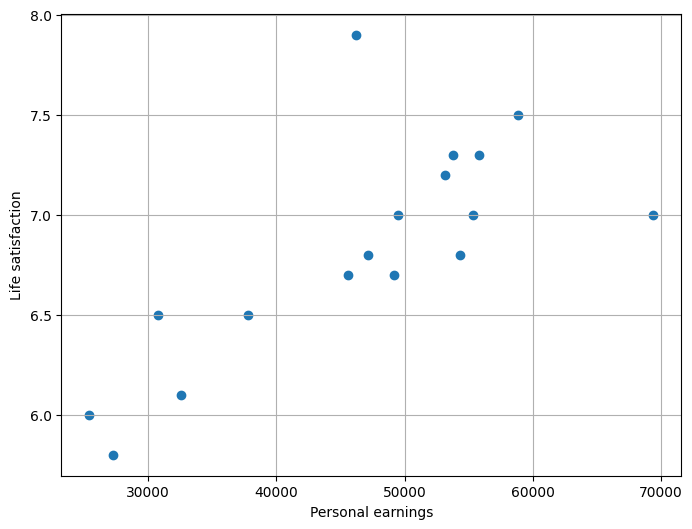

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.xlabel('Personal earnings')
plt.ylabel('Life satisfaction')
plt.grid(True)
plt.show;

Primeiro, precisamos calcular o <b>coeficiente angular</b>. É a partir dele que vamos encontrar o valor da inclinação da reta em relação ao eixo horizontal (x). Podemos obtê-lo a partir da seguinte formula:

$$
b_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

onde:

- $b_1$ representa o coeficiente angular.
- $n$ é o número total de observações.
- $x_i$ é o valor da variável independente para a i-ésima observação.
- $y_i$ é o valor da variável dependente para a i-ésima observação.
- $\bar{x}$ é a média de todos os valores da variável independente.
- $\bar{y}$ é a média de todos os valores da variável dependente.


In [31]:
# na pratica

# calculando o número total de observações
n = len(x) # 'n' o número total de observações

# calculando as médias das váriaveis
media_x = np.mean(x)
media_y = np.mean(y)


# calculando o númerador 
# para cada ponto, calculamos a diferença entre o valor de x e a sua média (covariância)
# e a diferença entre o valor de y e sua média. Multiplicamos essas diferenças
# para cada ponto e somamos todos esses produtos.
numerador = np.sum((x - media_x) * (y - media_y))

# calculando o denominador
# Para cada ponto de dado, calculamos a diferença entre o valor de x e sua média
# elevamos essa difereça ao quadrado e somamos todos esses quadrados.
denominador = np.sum((x - media_x) ** 2)

# b1 representa a inclinação da reta.
# Isso nos dis o quanto a variável y muda em média para cada aumento na variável x
b1 = numerador / denominador

print(f'{b1:.6f}')

0.000034


Agora precisamos encontrar o valor do <b>intercepto</b>, ele calcula o valor de $y$ quando $x$ for igual a <b>zero</b>.
Podemos obtê-lo a partir da seguinte formula:

$$ b_0 = \bar{y} - B_1\bar{x} $$

Onde:
- $b_o$ é o intercept.
- $\bar{y}$ é a media de todos os valores da variavel $y$.
- $b_1$ é o coeficiente angular.
- $\bar{x}$ é a média de todos os valore independentes

In [32]:
# calcular o intercepto
b0 = media_y - (b1 * media_x)
b0

print(f'O valor do intercepto é: {b0:.2f}')

O valor do intercepto é: 5.26


In [ ]:
# teremos a seguinte equação
print(f"price = {b1:.6f} * area + ({b0:.2f})")

price = 0.000034 * area + (5.26)


In [ ]:
# aplicando a equação
pivot_df = pivot_df[['Personal earnings', 'Life satisfaction']]
pivot_df['y_previsto'] = b1 * x + b0
pivot_df

Indicator,Personal earnings,Life satisfaction,y_previsto
1,53132.0,7.2,7.050352
2,54327.0,6.8,7.090618
4,55342.0,7.0,7.124818
10,30720.0,6.5,6.295173
11,46230.0,7.9,6.817787
12,45581.0,6.7,6.795919
13,53745.0,7.3,7.071007
14,27207.0,5.8,6.176801
15,25409.0,6.0,6.116217
17,49474.0,7.0,6.927094


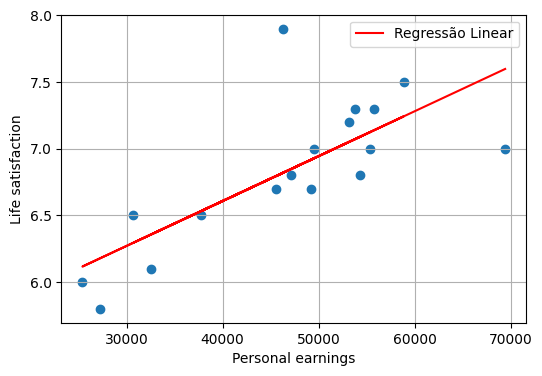

In [ ]:
# visualizando a linha da equação
plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.xlabel('Personal earnings')
plt.ylabel('Life satisfaction')
plt.plot(x,pivot_df['y_previsto'], color='red', label='Regressão Linear')
plt.grid(True)
plt.legend() 
plt.show;

De maneira simplificada, podemos calcular a precisão do modelo travéz do <b>Erro quadratico médio (MSE em ingles)</b>.

$$ 
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

onde:
- $n$ é o número total de observações.
- $\sum_{i=1}^{n}$ indica a soma de todos os valores de $i$ de 1 até $n$.
- y_i$ é o valore real da i-ésima observação.
- $\hat{y}_i$ é o valor previsto para a i-ésima observação.
- $(y_i - \hat{y}_1)^2$ é o erro quadratico, ou  seja, a diferença entre o valore real e o previsto elevado ao quadrado.


In [ ]:
# Calculando o erro do modelo
pivot_df['erro'] = (pivot_df['Life satisfaction'] - pivot_df['y_previsto'])**2
erro_quadratico_medio = np.mean(pivot_df['erro'])
print(f'Erro quadratico médio: {erro_quadratico_medio:.2f}')
pivot_df


Erro quadratico médio: 0.12


Indicator,Personal earnings,Life satisfaction,y_previsto,erro
1,53132.0,7.2,7.050352,0.022395
2,54327.0,6.8,7.090618,0.084459
4,55342.0,7.0,7.124818,0.015580
10,30720.0,6.5,6.295173,0.041954
11,46230.0,7.9,6.817787,1.171185
12,45581.0,6.7,6.795919,0.009200
13,53745.0,7.3,7.071007,0.052438
14,27207.0,5.8,6.176801,0.141979
15,25409.0,6.0,6.116217,0.013506
17,49474.0,7.0,6.927094,0.005315


Nesse caso, obtivemos um MSE de 0.12, ou seja, é o quanto os pontos de dados se afastam da linha traçada.

<p>O desenvolvimente de um modelo é algo muito mais complexo do que isso. Aqui, a minha ideia foi apenas, praticar de maneira um pouco manual a forma de é realizado o calculo básico de um regressão linear.